# 1. Install Dependencies and Setup

In [3]:
!python -m pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.20.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 13.0 MB/s  0:00:15 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 14.5 MB/s  0:00:0015.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.8/663.8 kB 13.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.0 MB/s  0:00:000.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 13.5 MB/s  0:00:023.7 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 13.9 MB/s  0:00:00 16.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.0 MB/s  0:00:00 14.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import tensorflow as tf
import os

Matplotlib is building the font cache; this may take a moment.


In [4]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.3.1
appnope                 0.1.4
asttokens               3.0.1
astunparse              1.6.3
certifi                 2025.11.12
charset-normalizer      3.4.4
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.17
decorator               5.2.1
executing               2.2.1
flatbuffers             25.9.23
fonttools               4.60.1
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.76.0
h5py                    3.15.1
idna                    3.11
ipykernel               7.1.0
ipython                 9.7.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.9.1
keras                   3.12.0
kiwisolver              1.4.9
libclang                18.1.1
Markdown                3.10
markdown-it-py          4.0.0
MarkupSafe         

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [10]:
import cv2
import os

In [11]:
data_dir = 'data' 

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
image_extsfor image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    # skip if not a directory
    if not os.path.isdir(class_dir):
        continue

    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)

        try:
            # Try to read the image
            img = cv2.imread(image_path)

            # If OpenCV can't read it, it's likely corrupted or not an image
            if img is None:
                print(f'Corrupted or unreadable image {image_path}')
                # os.remove(image_path)
                continue

            # Check extension from filename
            ext = os.path.splitext(image)[1].lower().replace('.', '')
            if ext not in image_exts:
                print(f'Image not in ext list {image_path}')
                # os.remove(image_path)

        except Exception as e:
            print(f'Issue with image {image_path}: {e}')
            # os.remove(image_path)

['jpeg', 'jpg', 'bmp', 'png']

In [16]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    # skip if not a directory
    if not os.path.isdir(class_dir):
        continue

    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)

        try:
            # Try to read the image
            img = cv2.imread(image_path)

            # If OpenCV can't read it, it's likely corrupted or not an image
            if img is None:
                print(f'Corrupted or unreadable image {image_path}')
                # os.remove(image_path)
                continue

            # Check extension from filename
            ext = os.path.splitext(image)[1].lower().replace('.', '')
            if ext not in image_exts:
                print(f'Image not in ext list {image_path}')
                # os.remove(image_path)

        except Exception as e:
            print(f'Issue with image {image_path}: {e}')
            # os.remove(image_path)


# 3. Load Data

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

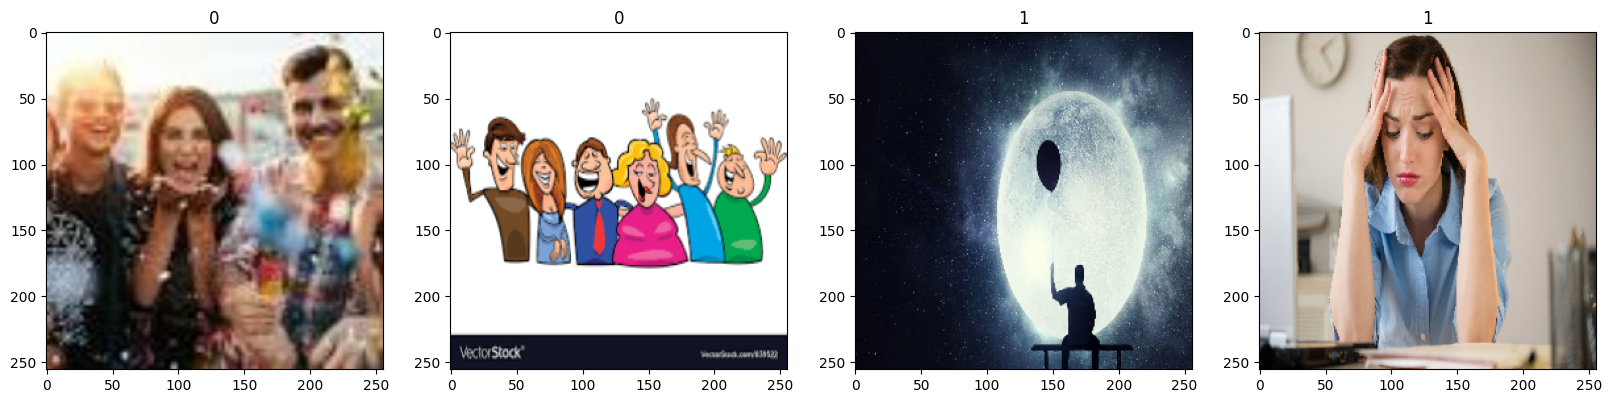

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          ...,
          [0.43206188, 0.26868874, 0.16078432],
          [0.49977022, 0.29193473, 0.16078432],
          [0.53231466, 0.32054994, 0.17966452]],
 
         [[0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          [0.54901963, 0.6509804 , 0.7490196 ],
          ...,
          [0.42674074, 0.26336756, 0.15546316],
          [0.4932875 , 0.28545204, 0.15430161],
          [0.527743  , 0.3159783 , 0.17509289]],
 
         [[0.5501455 , 0.6521063 , 0.75014555],
          [0.5501455 , 0.6521063 , 0.75014555],
          [0.5501455 , 0.6521063 , 0.75014555],
          ...,
          [0.4189679 , 0.25559473, 0.14769033],
          [0.48506433, 0.27722886, 0.14607844],
          [0.5198641 , 0.30809936, 0.16721396]],
 
         ...,
 
         [[0.27003744, 0.2534745 , 0.2528924 ],
          [0.2693 

# 5. Split Data

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

7

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/muskanpatel/Desktop/PythonImage_Classifier/imageclassifier/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.5446 - loss: 1.4462 - val_accuracy: 0.4062 - val_loss: 1.0150
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.5446 - loss: 0.7253 - val_accuracy: 0.7812 - val_loss: 0.6777
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.6071 - loss: 0.6747 - val_accuracy: 0.8906 - val_loss: 0.6270
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.7589 - loss: 0.6029 - val_accuracy: 0.6250 - val_loss: 0.6420
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.7321 - loss: 0.5422 - val_accuracy: 0.8906 - val_loss: 0.4746
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.8259 - loss: 0.4860 - val_accuracy: 0.9375 - val_loss: 0.3328
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.8884 - loss: 0.3656 - val_accuracy: 0.9688 - val_loss: 0.1789
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9464 - loss: 0.1952 - val_accuracy: 0.7344 - val_loss:

# 8. Plot Performance

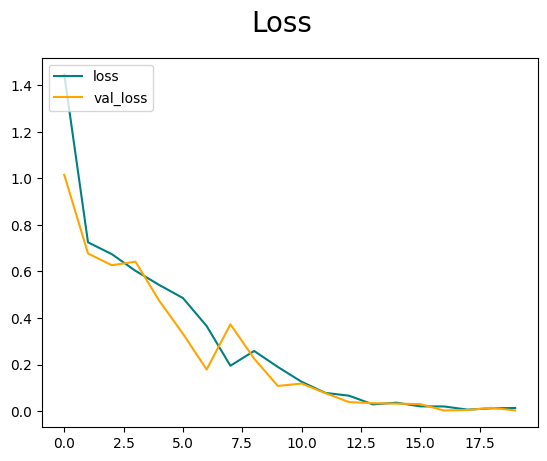

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

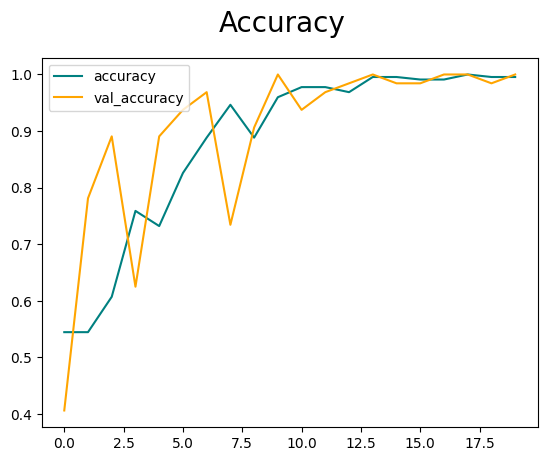

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


2025-11-16 15:02:32.575361: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [57]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9090909361839294, Accuracy: 0.9411764740943909


# 10. Test

In [42]:
import cv2

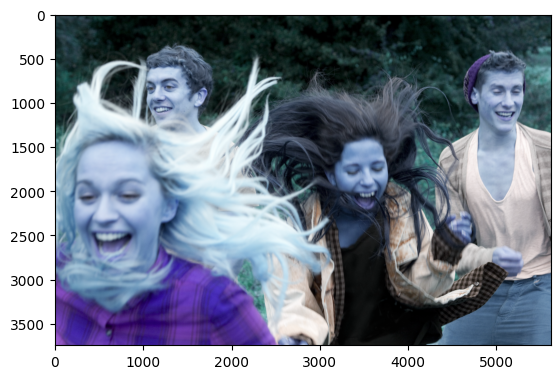

In [43]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

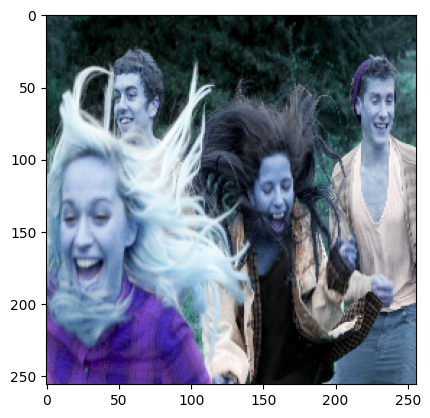

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [46]:
yhat

array([[0.00096491]], dtype=float32)

In [47]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [64]:
import os
import numpy as np
from tensorflow.keras.models import load_model

In [65]:
os.makedirs('models', exist_ok=True)
model.save('models/imageclassifier.h5')

In [66]:
new_model = load_model('models/imageclassifier.h5')

In [67]:
img = resize / 255.0          # normalize
img_batch = np.expand_dims(img, axis=0)  # shape: (1, h, w, c)

# Get prediction
yhat = new_model.predict(img_batch)[0][0]   # for binary sigmoid output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [68]:
print("Raw prediction:", yhat)

if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Raw prediction: 0.00096491387
Predicted class is Happy
